In [28]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


In [98]:
test = False
filename = "test.txt" if test else "input.txt"

In [99]:
with open(filename) as file:
    lines = file.readlines()

lines = [line.strip() for line in lines]
lines = [line.split("->") for line in lines]
node_to_tuple = lambda node: (int(node[1]), int(node[0]))
lines = [[node_to_tuple(node.split(",")) for node in line] for line in lines]
lines = [np.array(line) for line in lines]

max_x, max_y = 0, 0
min_x = [float("inf")]
for line in lines:
    max_x = max(line[:, 1].max(), max_x)
    max_y = max(line[:, 0].max(), max_y)
    min_x = min(line[:, 1].min(), min_x)

print(lines)
normalise_nodes = lambda line: line - np.array([[0 ,min_x]]*line.shape[0])
lines = [normalise_nodes(line) for line in lines]
print(lines)

[array([[144, 495],
       [144, 499]]), array([[ 40, 492],
       [ 43, 492],
       [ 43, 484],
       [ 50, 484],
       [ 50, 499],
       [ 43, 499],
       [ 43, 496],
       [ 40, 496]]), array([[ 13, 499],
       [ 17, 499],
       [ 17, 497],
       [ 25, 497],
       [ 25, 505],
       [ 17, 505],
       [ 17, 502],
       [ 13, 502]]), array([[141, 504],
       [141, 508]]), array([[135, 498],
       [135, 502]]), array([[ 13, 499],
       [ 17, 499],
       [ 17, 497],
       [ 25, 497],
       [ 25, 505],
       [ 17, 505],
       [ 17, 502],
       [ 13, 502]]), array([[101, 511],
       [ 96, 511],
       [101, 511],
       [101, 513],
       [ 93, 513],
       [101, 513],
       [101, 515],
       [ 94, 515],
       [101, 515]]), array([[147, 485],
       [147, 490]]), array([[153, 483],
       [153, 488]]), array([[151, 479],
       [151, 484]]), array([[ 77, 490],
       [ 68, 490],
       [ 77, 490],
       [ 77, 492],
       [ 75, 492],
       [ 77, 492],
       [ 7

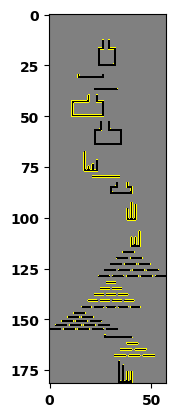

In [100]:
def reset_map():
    scan:np.ndarray = np.zeros((max_y+1,max_x-min_x+1), dtype=int)
    for line in lines:
        for j in range(len(line)-1):
            nodes=line[j:j+2,:]
            start = np.min(nodes, axis=0,)
            end = np.max(nodes, axis=0, )+1
            scan[start[0]:end[0],start[1]:end[1]]=2
    return scan

def show_map(scan):
    colormap=ListedColormap(['gray','yellow', 'black'])
    _=plt.imshow(scan,cmap=colormap)
    plt.show()
scan = reset_map()
show_map(scan)

In [107]:
def drop_sand(scan):
    origin=(np.array((0,500-min_x)))
    moves=np.array([[1,0],[1,-1],[1,1]])

    position=origin.copy()
    for _ in range(len(scan)-1):
        for move in moves:
            new_pos=position+move
            if scan[new_pos[0], new_pos[1]]==0:
                position+= move
                break
        else:
            break
    else: return True
    scan[position[0],position[1]]=1
    return False 

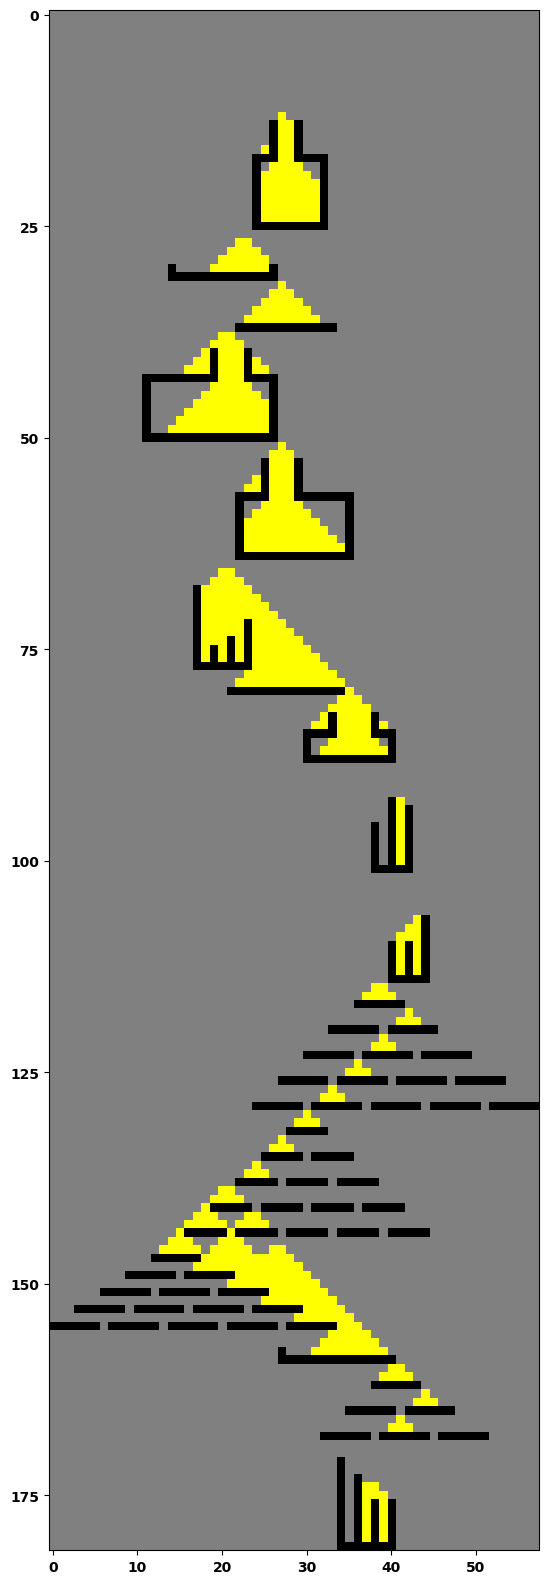

638


In [108]:
scan=reset_map()
done=False
drops=-1
while not done:
    done=drop_sand(scan)
    drops+=1
_=plt.figure(figsize=(20,20))
show_map(scan)
print(drops)